In [1]:
import pandas as pd
import numpy as np 


In [2]:
# file path
annotator_path_1 = './Annotation-100-pairs-1.csv'
annotator_path_2 = './Annotation-100-pairs-2.csv'
# read csv file
annotator12 = pd.read_csv(annotator_path_1, sep = ',', header = None)
annotator35 = pd.read_csv(annotator_path_2, sep = ',', header = None)
annotator1 = annotator12.iloc[2:,:4]
annotator1.columns = ['concept1', 'concept2', 'a1', 'a2']
annotator2 = annotator35.iloc[2:,:5]
annotator2.columns = ['concept1', 'concept2', 'a3', 'a4', 'a5']
annot_manual = annotator1.merge(annotator2, on=['concept1', 'concept2'],how='outer')
annot_manual.head(5)

,concept1,concept2,a1,a2,a3,a4,a5
0,flux integral,vector,0,0,0,0,0
1,skew lines,gravitational force,0,0,1,1,0
2,electrostatic fields,skew lines,0,0,0,0,0
3,harmonic function,electrostatic fields,0,0,1,1,NaN
4,osculating circle,harmonic function,0,0,0,0,0


In [23]:
# replace '0' to -1 
annot_manual['a1'].replace("0",-1, inplace = True)
annot_manual['a2'].replace("0",-1, inplace = True)
annot_manual['a3'].replace("0",-1, inplace = True)
annot_manual['a4'].replace("0",-1, inplace = True)
annot_manual['a5'].replace("0",-1, inplace = True)
# replace "1" to 1
annot_manual['a1'].replace("1",1, inplace = True)
annot_manual['a2'].replace("1",1, inplace = True)
annot_manual['a3'].replace("1",1, inplace = True)
annot_manual['a4'].replace("1",1, inplace = True)
annot_manual['a5'].replace("1",1, inplace = True)
# replace nan to 0
annot_manual = annot_manual.fillna(0)

# create a 'vote' column
annot_manual['vote'] = None

# loop
for i in range(len(annot_manual['concept1'])):
    if (annot_manual['a1'][i]+ annot_manual['a2'][i]+annot_manual['a3'][i]+annot_manual['a4'][i]+annot_manual['a5'][i]) > 0:
        annot_manual['vote'][i] = int(1)
    elif (annot_manual['a1'][i]+ annot_manual['a2'][i]+annot_manual['a3'][i]+annot_manual['a4'][i]+annot_manual['a5'][i]) < 0:
        annot_manual['vote'][i] = int(0)
    else:
        annot_manual['vote'][i] = int(5)

/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/ipykernel_8889/2723395917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annot_manual['vote'][i] = int(0)
/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/ipykernel_8889/2723395917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  annot_manual['vote'][i] = int(0)
/var/folders/v4/krlcpnt52353p49_jcdkjjnw0000gn/T/ipykernel_8889/2723395917.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versu

<AxesSubplot:>

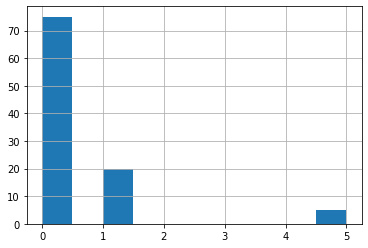

In [30]:
annot_manual['vote'].hist()

In [39]:
annot_manual_100 = annot_manual.drop(['a1', 'a2', 'a3', 'a4', 'a5'], axis = 'columns')

In [40]:
annot_manual_100.to_csv("annot_manual_100.csv")